# AutoModel for Cifar100

The autokeras library to automatically search for the best neural network architecture for classifying the CIFAR-100 dataset. It first loads the dataset, converts the labels to categorical format, and defines an AutoModel using the autokeras.The AutoModel is initialized with the defined input and output nodes, and fit to the training data using 10 epochs and a maximum of 1 trials. 

Imports necessary libraries including autokeras, torch, matplotlib, numpy, and tensorflow.keras. 

In [1]:
import autokeras as ak
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

2023-03-29 15:33:44.473596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 15:33:44.664326: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-29 15:33:44.664351: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-29 15:33:45.504123: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Loads the CIFAR-100 dataset using the tensorflow.keras.datasets module, and splits it into training and testing sets. And converts the labels to categorical format using the to_categorical() function .Also prints the shapes of the training and testing data.

In [2]:

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


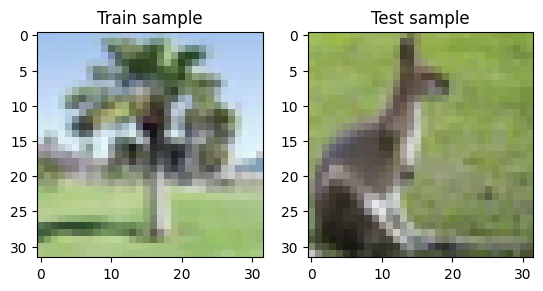

In [3]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(x_train[1234])
ax.set_title('Train sample')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()


Here defines the AutoModel using the AutoKeras library, which consists of an ImageInput layer, an ImageBlock layer, a Flatten layer, a DenseBlock layer, and a ClassificationHead layer.

In [4]:
# Define the AutoModel
input_node = ak.ImageInput()
output_node = ak.ImageBlock()(input_node)
output_node = ak.Flatten()(output_node)
output_node = ak.DenseBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)

Here initializes the AutoModel with input and output nodes, and specifies hyperparameters such as the maximum number of trials.

In [6]:
# Initialize the AutoModel
clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=2
)

Fits the AutoModel to the training data, with a specified number of epochs here 10 epochs

In [7]:
# Fit the AutoModel to the CIFAR-100 dataset
clf.fit(x_train, y_train, epochs=2)

Trial 2 Complete [01h 22m 38s]
val_loss: 4.363196849822998

Best val_loss So Far: 4.363196849822998
Total elapsed time: 02h 42m 25s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
1563/1563 [==============================] - 3063s 2s/step - loss: 4.6082 - accuracy: 0.0089
Epoch 2/2
1563/1563 [==============================] - 3068s 2s/step - loss: 4.6059 - accuracy: 0.0083


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


Evaluates the accuracy of the AutoModel on the test data.

In [8]:

# Evaluate the AutoModel on the test data
accuracy = clf.evaluate(x_test, y_test)[1]
print('Accuracy: {:.2f}%'.format(accuracy * 100))


313/313 [==============================] - 27s 82ms/step - loss: 4.6052 - accuracy: 0.0100
Accuracy: 1.00%


Finally, exports the trained model as a Keras model, prints the type and summary of the Keras model.

In [9]:
# Export as a Keras Model.
model = clf.export_model()
#print(model)
print(type(model))  
model.summary()

<class 'keras.engine.functional.Functional'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 32, 32, 3)        0         
 t32)                                                            
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                